In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sales_df=pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data/Nashville_home_sales_data.csv',low_memory=False)

In [3]:
sales_df['Sale Date'] = pd.to_datetime(sales_df['Sale Date'])

In [4]:
start_date = '2020-01-01'
end_date   = '2023-12-31'

In [5]:
sales_df = sales_df[(sales_df['Sale Date'] >= start_date) & (sales_df['Sale Date'] <= end_date)]

In [6]:
single_family=sales_df[sales_df['Land Use Description']=='SINGLE FAMILY'].copy()

In [7]:
single_family['Sale Year'] = single_family['Sale Date'].dt.year
single_family['Sale Month'] = single_family['Sale Date'].dt.month
single_family['Sale Month Name'] = single_family['Sale Date'].dt.month_name()

In [8]:
single_family['Parcel Zip Code'] = single_family['Parcel Zip Code'].astype(int)

In [9]:
single_family.head()

,OBJECTID,APN,Feature Type,Floor Number,Parcel ID,Census Tract,Council District,Tax District,Owner,Sale Date,...,Land Appraised Value,Improvement Appraised Value,Total Appraised Value,Zoning,Shape__Area,Latitude,Longitude,Sale Year,Sale Month,Sale Month Name
0,1,186040A17200CO,Lot,NaN,361372.0,37019114.0,33.0,GSD,"CLARK, HERSHEL WAYNE",2021-10-06 05:00:00,...,120000.0,338000.0,458000.0,R8,6786.003601,35.988913,-86.675994,2021,10,October
7,8,186040A19300CO,Lot,NaN,361393.0,37019114.0,33.0,GSD,"KENNEDY, RONALD WILLIAM SR & DARLEEN GAIL",2020-04-17 05:00:00,...,120000.0,319300.0,439300.0,R8,6050.071777,35.988885,-86.675141,2020,4,April
11,12,186040A20900CO,Lot,NaN,361409.0,37019114.0,33.0,GSD,"TOLINE, ROBERT E",2023-02-22 06:00:00,...,120000.0,414600.0,534600.0,R8,9853.479431,35.988291,-86.675788,2023,2,February
14,15,041060A00800CO,Lot,NaN,361437.0,37010901.0,3.0,GSD,"ALEXANDER, VICTOR WENDELL & KEENA",2022-09-28 05:00:00,...,89000.0,403900.0,492900.0,RS20,10704.041748,36.271489,-86.774518,2022,9,September
24,25,041060A03800CO,Lot,NaN,361467.0,37010901.0,3.0,GSD,"VANLIER, ANTWAN J",2021-08-17 05:00:00,...,89000.0,268300.0,357300.0,RS20,10037.195190,36.270840,-86.773803,2021,8,August


In [10]:
single_family.columns

Index(['OBJECTID', 'APN', 'Feature Type', 'Floor Number', 'Parcel ID',
       'Census Tract', 'Council District', 'Tax District', 'Owner',
       'Sale Date', 'Sale Price', 'Owner Instrument', 'Owner Address 1',
       'Owner Address 2', 'Owner Address 3', 'Owner City', 'Owner State',
       'Owner Country', 'Owner Zip Code', 'Parcel Address',
       'Parcel House Number', 'Parcel House Number Extension',
       'Parcel Street Name', 'Parcel Suite/Unit Number', 'Parcel City',
       'Parcel State', 'Parcel Zip Code', 'Legal Description',
       'Parcel Instrument', 'Parcel Date', 'Acres', 'Frontage (ft)',
       'Side (ft)', 'Is Regular Shape?', 'Land Use Code',
       'Land Use Description', 'Land Appraised Value',
       'Improvement Appraised Value', 'Total Appraised Value', 'Zoning',
       'Shape__Area', 'Latitude', 'Longitude', 'Sale Year', 'Sale Month',
       'Sale Month Name'],
      dtype='object')

In [11]:
unique_zips = single_family['Parcel Zip Code'].unique()

In [12]:
unique_zips

array([37135, 37207, 37076, 37013, 37217, 37027, 37209, 37211, 37208,
       37189, 37138, 37221, 37214, 37215, 37206, 37220, 37204, 37203,
       37218, 37216, 37080, 37205, 37115, 37210, 37072, 37122, 37212,
       37143, 37015, 37064])

In [13]:
mortgage_rate_30=pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data/mortgage_rate_30.csv')

In [14]:
mortgage_rate_15=pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data/mortgage_rate_15.csv')

In [15]:
mortgage_rate_30['observation_date'] = pd.to_datetime(mortgage_rate_30['observation_date'])
mortgage_rate_15['observation_date'] = pd.to_datetime(mortgage_rate_15['observation_date'])

In [16]:
mortgage_rate = pd.merge(mortgage_rate_30, mortgage_rate_15, on='observation_date')

In [17]:
mortgage_rate['Year'] = mortgage_rate['observation_date'].dt.year
mortgage_rate['Month_Name'] = mortgage_rate['observation_date'].dt.month_name()

In [18]:
mortgage_rate = mortgage_rate[(mortgage_rate['Year'] >= 2020) & (mortgage_rate['Year'] <= 2023)]

In [19]:
mortgage_rate = mortgage_rate.reset_index(drop=True)

In [20]:
mortgage_rate.head()

,observation_date,MORTGAGE30US,MORTGAGE15US,Year,Month_Name
0,2020-01-02,3.72,3.16,2020,January
1,2020-01-09,3.64,3.07,2020,January
2,2020-01-16,3.65,3.09,2020,January
3,2020-01-23,3.60,3.04,2020,January
4,2020-01-30,3.51,3.00,2020,January


In [21]:
redfin_df=pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data/redfin_data.csv')

In [22]:
redfin_df['Median Sale Price'] = (redfin_df['Median Sale Price'].str.replace('$','').str.replace('K','000').astype(float))

In [23]:
cols = ['Homes Sold', 'New Listings', 'Inventory']
for col in cols:
    redfin_df[col] = redfin_df[col].str.replace(',', '').astype(int)

In [24]:
redfin_df.head()

,Region,Month,Year,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Nashville, TN metro area",January,2014,188000.0,-2.30%,NaN,1725,-26.60%,NaN,2883,...,NaN,10778,2.70%,NaN,105,13,NaN,97.00%,-0.30%,NaN
1,"Nashville, TN metro area",February,2014,182000.0,-2.90%,10.00%,1820,5.50%,3.90%,2993,...,-4.40%,11408,5.80%,-8.40%,102,-3,-11.0,97.10%,0.10%,0.70%
2,"Nashville, TN metro area",March,2014,190000.0,4.30%,15.20%,2433,33.70%,-1.40%,3775,...,5.90%,12043,5.60%,-6.20%,91,-11,-17.0,97.60%,0.50%,0.60%
3,"Nashville, TN metro area",April,2014,194000.0,1.90%,7.60%,2679,10.10%,-1.00%,4105,...,-0.60%,12877,6.90%,-5.00%,73,-18,-13.0,97.50%,-0.10%,0.20%
4,"Nashville, TN metro area",May,2014,200000.0,3.40%,6.10%,3024,12.90%,0.90%,3953,...,5.30%,13133,2.00%,-4.20%,70,-3,-11.0,97.80%,0.20%,0.10%


In [25]:
redfin_df.columns

Index(['Region', 'Month', 'Year', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY '],
      dtype='object')

Total sales by zip code for each year

In [26]:
import pytidycensus as tc
import requests

C:\Users\lukem\AppData\Local\Temp\ipykernel_19264\1944532410.py:1: UserWarning: Mapping functions unavailable due to import error: NameError. To use mapping features, ensure all dependencies are properly installed: pip install pytidycensus[map]
  import pytidycensus as tc


In [27]:
API_KEY = '5206a3fd5690e9a1ab1ce6fb7d2fbdbd52895891'

In [28]:
zip_codes = ['37135', '37207', '37076', '37013', '37217', '37027', '37209', '37211',
    '37208', '37189', '37138', '37206', '37221', '37214', '37215', '37220',
    '37204', '37203', '37218', '37212', '37216', '37205', '37080', '37115',
    '37210', '37072', '37122', '37143', '37015', '37201', '37064', '37213', '37086']

In [29]:
variables = {
    'B01003_001E': 'Population',
    'B19013_001E': 'MedianIncome',
    'B25077_001E': 'MedianHomeValue',
    'B25064_001E': 'MedianRent',
    'B25002_001E': 'TotalHousingUnits',
    'B25003_002E': 'OccupiedUnits',
    'B25003_003E': 'VacantUnits',
    'B17001_001E': 'PovertyUniverse',
    'B17001_002E': 'BelowPoverty'}

In [30]:
years = ['2018', '2019', '2020', '2021', '2022', '2023']

In [31]:
def get_acs_data(year):
    base_url = f'https://api.census.gov/data/{year}/acs/acs5'
    all_data = []
    for zcta in zip_codes:
        response = requests.get(base_url, params={
            'get': ','.join(variables.keys()),
            'for': f'zip code tabulation area:{zcta}',
            'key': API_KEY})
        if response.status_code == 200 and len(response.json()) > 1:
            row = response.json()[1]
            record = {'ZCTA': zcta, 'ACS_Year': year}
            for i, var in enumerate(variables.keys()):
                record[variables[var]] = row[i]
            all_data.append(record)
        else:
            print(f'No data for ZCTA {zcta} in {year}')
    return pd.DataFrame(all_data)

In [32]:
df_list = []
for year in years:
    print(f'Pulling ACS {year} data...')
    df_year = get_acs_data(year)
    df_list.append(df_year)
census_data = pd.concat(df_list, ignore_index=True)

Pulling ACS 2018 data...
No data for ZCTA 37135 in 2018
No data for ZCTA 37207 in 2018
No data for ZCTA 37076 in 2018
No data for ZCTA 37013 in 2018
No data for ZCTA 37217 in 2018
No data for ZCTA 37027 in 2018
No data for ZCTA 37209 in 2018
No data for ZCTA 37211 in 2018
No data for ZCTA 37208 in 2018
No data for ZCTA 37189 in 2018
No data for ZCTA 37138 in 2018
No data for ZCTA 37206 in 2018
No data for ZCTA 37221 in 2018
No data for ZCTA 37214 in 2018
No data for ZCTA 37215 in 2018
No data for ZCTA 37220 in 2018
No data for ZCTA 37204 in 2018
No data for ZCTA 37203 in 2018
No data for ZCTA 37218 in 2018
No data for ZCTA 37212 in 2018
No data for ZCTA 37216 in 2018
No data for ZCTA 37205 in 2018
No data for ZCTA 37080 in 2018
No data for ZCTA 37115 in 2018
No data for ZCTA 37210 in 2018
No data for ZCTA 37072 in 2018
No data for ZCTA 37122 in 2018
No data for ZCTA 37143 in 2018
No data for ZCTA 37015 in 2018
No data for ZCTA 37201 in 2018
No data for ZCTA 37064 in 2018
No data for ZC

In [33]:
census_data

,ZCTA,ACS_Year,Population,MedianIncome,MedianHomeValue,MedianRent,TotalHousingUnits,OccupiedUnits,VacantUnits,PovertyUniverse,BelowPoverty
0,37135,2020,17318,128281,441700,1625,5396,4981,375,17275,234
1,37207,2020,39151,50583,186700,954,16604,8793,6358,39024,8616
2,37076,2020,38647,64392,230900,1149,18196,9697,6985,38515,3854
3,37013,2020,99109,60602,205800,1182,39126,20207,16010,98569,15801
4,37217,2020,30947,50423,194800,1027,14169,5890,6834,30899,5724
...,...,...,...,...,...,...,...,...,...,...,...
127,37015,2023,19547,74848,259500,1244,8366,5905,1635,19280,1185
128,37201,2023,1426,88438,391900,1944,1525,380,446,1137,205
129,37064,2023,66641,121492,664000,1810,25302,18916,5339,66062,3685
130,37213,2023,35,-666666666,-666666666,-666666666,12,0,12,12,0


In [57]:
census_data['ZCTA'] = census_data['ZCTA'].astype(int)

In [58]:
numeric_cols = [
    'ACS_Year',
    'Population',
    'MedianIncome',
    'MedianHomeValue',
    'MedianRent',
    'TotalHousingUnits',
    'OccupiedUnits',
    'VacantUnits',
    'PovertyUniverse',
    'BelowPoverty']

In [59]:
for col in numeric_cols:
    census_data[col] = pd.to_numeric(census_data[col], errors='coerce')

In [60]:
census_data = census_data.replace(-666666666, pd.NA)

* Total homes sales over the span of the dataset 2020-2023

In [62]:
total_homes_sold=single_family.shape[0]

In [63]:
print(total_homes_sold)

40434


* Average number of home sales per year 

In [64]:
avg_annual_sales = single_family.groupby('Sale Year').size().mean().round(0)

In [65]:
print(avg_annual_sales)

10108.0


* Median Home sale price for the yeaar 2020 and 2023

In [66]:
median_price_2020 = single_family[single_family['Sale Year'] == 2020]['Sale Price'].median()
median_price_2023 = single_family[single_family['Sale Year'] == 2023]['Sale Price'].median()

In [67]:
print(median_price_2020)

320000.0


In [68]:
print(median_price_2023)

437200.0


* Average median icome of residents in Metro Nashville

In [69]:
avg_median_income = census_data['MedianIncome'].replace(-666666666, pd.NA).mean().round(2)

In [70]:
print(avg_median_income)

82883.4


* Average population during this span

In [71]:
population_by_year = (census_data.groupby('ACS_Year')['Population'].sum().reset_index())

In [72]:
avg_population = population_by_year['Population'].mean()

In [73]:
print(avg_population)

981917.0


* Average Median rent

In [74]:
census_data['MedianRent'] = census_data['MedianRent'].replace(-666666666, pd.NA)

In [75]:
census_data = census_data.dropna(subset=['MedianRent'])

In [76]:
avg_median_rent = census_data['MedianRent'].mean()

In [77]:
print(avg_median_rent)

1413.5078125


* Average Mortagae rate for a 30 year fixed loan

In [145]:
avg_mortgage_rate = mortgage_rate['MORTGAGE30US'].mean().round(2)

In [146]:
print(avg_mortgage_rate)

4.55


1. How did median home values in the Metro Nashville area change between 2020 and 2023, and did household income growth keep pace with these increases?


In [147]:
metro_trends = (census_data.groupby('ACS_Year').agg(Median_Income=('MedianIncome', 'median'),Median_Home_Value=('MedianHomeValue', 'median')).reset_index())

In [148]:
metro_trends

,ACS_Year,Median_Income,Median_Home_Value
0,2020,64261.0,269500.0
1,2021,69748.0,302550.0
2,2022,76042.0,353950.0
3,2023,80709.5,383050.0


In [149]:
price_growth = (metro_trends.loc[metro_trends['ACS_Year'] == 2023, 'Median_Home_Value'].values[0] /metro_trends.loc[metro_trends['ACS_Year'] == 2020, 'Median_Home_Value'].values[0] - 1) * 100

In [176]:
print(price_growth)

42.592592592592595


In [151]:
income_growth = (metro_trends.loc[metro_trends['ACS_Year'] == 2023, 'Median_Income'].values[0] /metro_trends.loc[metro_trends['ACS_Year'] == 2020, 'Median_Income'].values[0] - 1) * 100

In [177]:
print(income_growth)

25.0


In [153]:
metro_trends['Price_to_Income_Ratio'] = ((metro_trends['Median_Home_Value'] /metro_trends['Median_Income']).round(2))

In [154]:
metro_trends

,ACS_Year,Median_Income,Median_Home_Value,Price_to_Income_Ratio
0,2020,64261.0,269500.0,4.19
1,2021,69748.0,302550.0,4.34
2,2022,76042.0,353950.0,4.65
3,2023,80709.5,383050.0,4.75


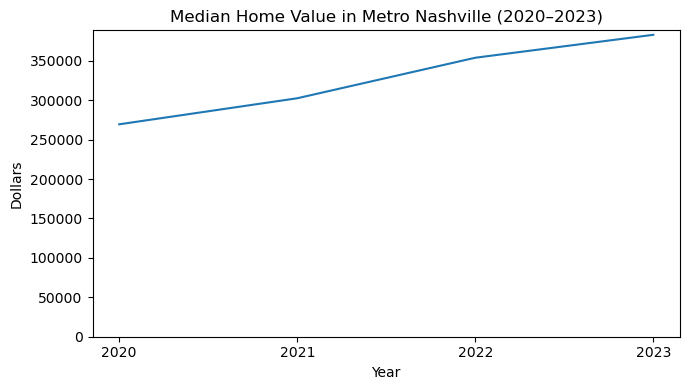

In [155]:
plt.figure(figsize=(7,4))
plt.plot(
    metro_trends['ACS_Year'],
    metro_trends['Median_Home_Value'])
plt.xticks(metro_trends['ACS_Year'])
plt.ylim(bottom=0)
plt.title('Median Home Value in Metro Nashville (2020–2023)')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.tight_layout()
plt.savefig('median_home_value_metro_nashville_2020_2023.png',dpi=300,bbox_inches='tight')
plt.show()

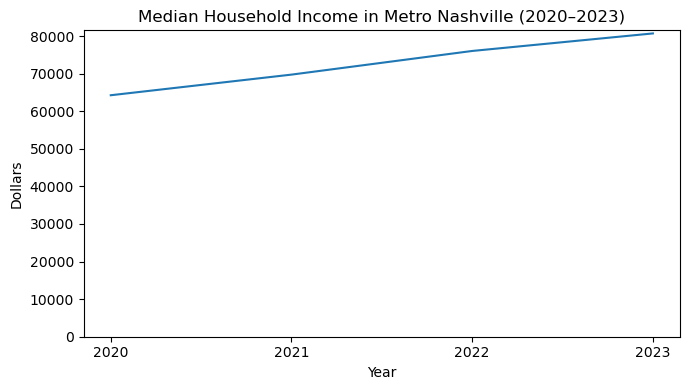

In [156]:
plt.figure(figsize=(7,4))
plt.plot(
    metro_trends['ACS_Year'],
    metro_trends['Median_Income'])
plt.xticks(metro_trends['ACS_Year'])
plt.ylim(bottom=0)
plt.title('Median Household Income in Metro Nashville (2020–2023)')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.tight_layout()
plt.savefig('median_household_income_metro_nashville_2020_2023.png',dpi=300,bbox_inches='tight')
plt.show()

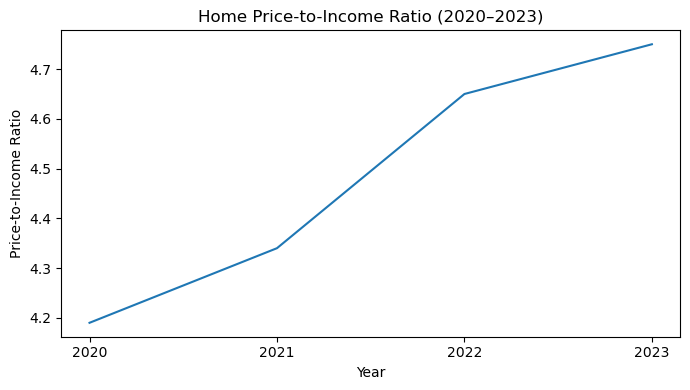

In [157]:
plt.figure(figsize=(7,4))
plt.plot(
    metro_trends['ACS_Year'],
    metro_trends['Price_to_Income_Ratio'])
plt.xticks(metro_trends['ACS_Year'])
plt.title('Home Price-to-Income Ratio (2020–2023)')
plt.xlabel('Year')
plt.ylabel('Price-to-Income Ratio')
plt.tight_layout()
plt.savefig('price_to_income_ratio_metro_nashville_2020_2023.png',dpi=300,bbox_inches='tight')
plt.show()

In [158]:
from matplotlib.ticker import FuncFormatter

In [160]:
def dollar_format(x, pos):
    return f'${x:,.0f}'
formatter = FuncFormatter(dollar_format)

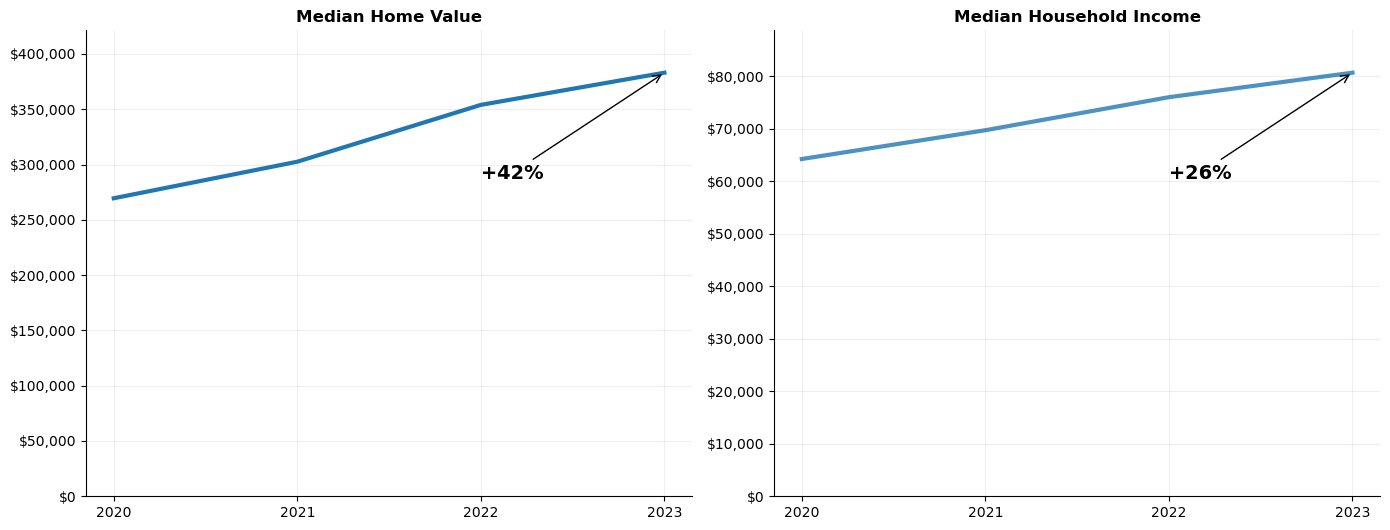

In [178]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(
    metro_trends['ACS_Year'],
    metro_trends['Median_Home_Value'],
    linewidth=3)
plt.title("Median Home Value", fontweight='bold')
plt.xticks(metro_trends['ACS_Year'])
plt.ylim(0, metro_trends['Median_Home_Value'].max() * 1.1)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.2)
price_growth = (
    (metro_trends['Median_Home_Value'].iloc[-1] -
     metro_trends['Median_Home_Value'].iloc[0]) /
     metro_trends['Median_Home_Value'].iloc[0]) * 100
plt.annotate(
    f"+{price_growth:.0f}%",
    xy=(metro_trends['ACS_Year'].iloc[-1],
        metro_trends['Median_Home_Value'].iloc[-1]),
    xytext=(metro_trends['ACS_Year'].iloc[-2],
            metro_trends['Median_Home_Value'].iloc[-1] * 0.75),
    arrowprops=dict(arrowstyle="->"),
    fontsize=14,
    fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.subplot(1, 2, 2)
plt.plot(
    metro_trends['ACS_Year'],
    metro_trends['Median_Income'],
    linewidth=3,
    alpha=0.8)
plt.title("Median Household Income", fontweight='bold')
plt.xticks(metro_trends['ACS_Year'])
plt.ylim(0, metro_trends['Median_Income'].max() * 1.1)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.2)
income_growth = (
    (metro_trends['Median_Income'].iloc[-1] -
     metro_trends['Median_Income'].iloc[0]) /
     metro_trends['Median_Income'].iloc[0]) * 100
plt.annotate(
    f"+{income_growth:.0f}%",
    xy=(metro_trends['ACS_Year'].iloc[-1],
        metro_trends['Median_Income'].iloc[-1]),
    xytext=(metro_trends['ACS_Year'].iloc[-2],
            metro_trends['Median_Income'].iloc[-1] * 0.75),
    arrowprops=dict(arrowstyle="->"),
    fontsize=14,
    fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("home_prices_vs_income_metro_nashville_2020_2023.png",dpi=300,bbox_inches="tight")
plt.show()

2. How did housing supply indicators including vacancy rates, occupied units, and housing stock change between 2020 and 2023, and what relationship did these trends have with housing affordability in Metro Nashville?

In [162]:
metro_supply = (census_data.groupby('ACS_Year').agg({'TotalHousingUnits': 'sum','OccupiedUnits': 'sum','VacantUnits': 'sum'}).reset_index())

In [163]:
metro_supply

,ACS_Year,TotalHousingUnits,OccupiedUnits,VacantUnits
0,2020,416976,233029,148721
1,2021,426433,240484,149831
2,2022,437873,246504,155053
3,2023,450906,251674,163457


In [164]:
metro_supply['VacancyRate'] = (metro_supply['VacantUnits'] / metro_supply['TotalHousingUnits'])

In [165]:
metro_supply

,ACS_Year,TotalHousingUnits,OccupiedUnits,VacantUnits,VacancyRate
0,2020,416976,233029,148721,0.356666
1,2021,426433,240484,149831,0.351359
2,2022,437873,246504,155053,0.354105
3,2023,450906,251674,163457,0.362508


In [166]:
change_summary = pd.DataFrame({'Metric': ['Total Housing Units','Occupied Units','Vacancy Rate'],'2020': [
        metro_supply.loc[metro_supply['ACS_Year'] == 2020, 'TotalHousingUnits'].values[0],
        metro_supply.loc[metro_supply['ACS_Year'] == 2020, 'OccupiedUnits'].values[0],
        metro_supply.loc[metro_supply['ACS_Year'] == 2020, 'VacancyRate'].values[0]],'2023': [
        metro_supply.loc[metro_supply['ACS_Year'] == 2023, 'TotalHousingUnits'].values[0],
        metro_supply.loc[metro_supply['ACS_Year'] == 2023, 'OccupiedUnits'].values[0],
        metro_supply.loc[metro_supply['ACS_Year'] == 2023, 'VacancyRate'].values[0]]})

In [167]:
change_summary['Percent Change'] = ((change_summary['2023'] - change_summary['2020']) /change_summary['2020']) * 100

In [168]:
change_summary

,Metric,2020,2023,Percent Change
0,Total Housing Units,416976.000000,450906.000000,8.137159
1,Occupied Units,233029.000000,251674.000000,8.001150
2,Vacancy Rate,0.356666,0.362508,1.638038


In [169]:
analysis_df = metro_supply.merge(metro_trends,on='ACS_Year',how='inner')

In [170]:
analysis_df

,ACS_Year,TotalHousingUnits,OccupiedUnits,VacantUnits,VacancyRate,Median_Income,Median_Home_Value,Price_to_Income_Ratio
0,2020,416976,233029,148721,0.356666,64261.0,269500.0,4.19
1,2021,426433,240484,149831,0.351359,69748.0,302550.0,4.34
2,2022,437873,246504,155053,0.354105,76042.0,353950.0,4.65
3,2023,450906,251674,163457,0.362508,80709.5,383050.0,4.75


In [172]:
analysis_df[['TotalHousingUnits', 'OccupiedUnits', 'VacancyRate', 'Price_to_Income_Ratio']].corr()

,TotalHousingUnits,OccupiedUnits,VacancyRate,Price_to_Income_Ratio
TotalHousingUnits,1.000000,0.988269,0.607920,0.975952
OccupiedUnits,0.988269,1.000000,0.479528,0.981105
VacancyRate,0.607920,0.479528,1.000000,0.506305
Price_to_Income_Ratio,0.975952,0.981105,0.506305,1.000000


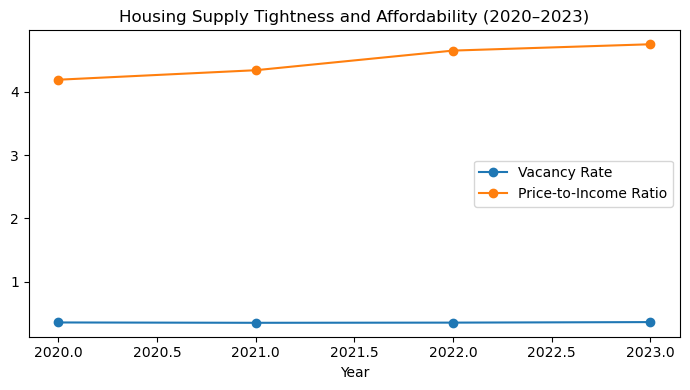

In [175]:
plt.figure(figsize=(7, 4))
plt.plot(
    analysis_df['ACS_Year'],
    analysis_df['VacancyRate'],
    marker='o',
    label='Vacancy Rate')
plt.plot(
    analysis_df['ACS_Year'],
    analysis_df['Price_to_Income_Ratio'],
    marker='o',
    label='Price-to-Income Ratio')
plt.title('Housing Supply Tightness and Affordability (2020–2023)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.savefig("affordability_chart",dpi=300,bbox_inches='tight')
plt.show()